## IMPORT PACKAGE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 1. Bagaimana hubungan umur terhadap biaya kesehatan

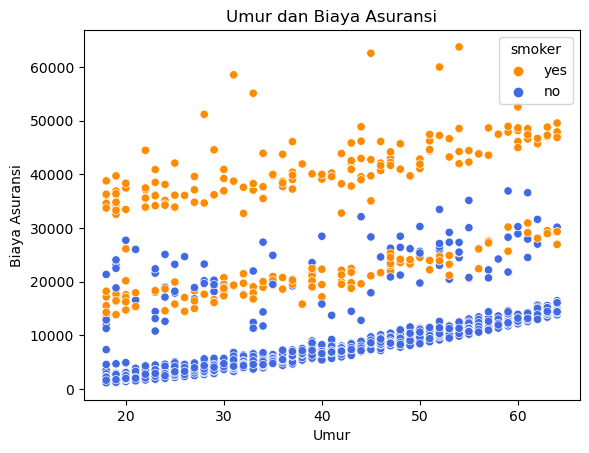

In [7]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=insurance, x='age', y='charges',hue='smoker')
ax.set(title='Umur dan Biaya Asuransi',
      xlabel='Umur',
      ylabel='Biaya Asuransi')
plt.show()

In [8]:
insurance["age"].corr(insurance["charges"])

0.29900819333064765

## 2. Bagaimana Jumlah Anak Kecil terhadap Biaya Kesehatan

In [9]:
children = insurance.groupby("children")["charges"].mean()
children

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [10]:
median_children = insurance.groupby("children")["charges"].median()
median_children

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

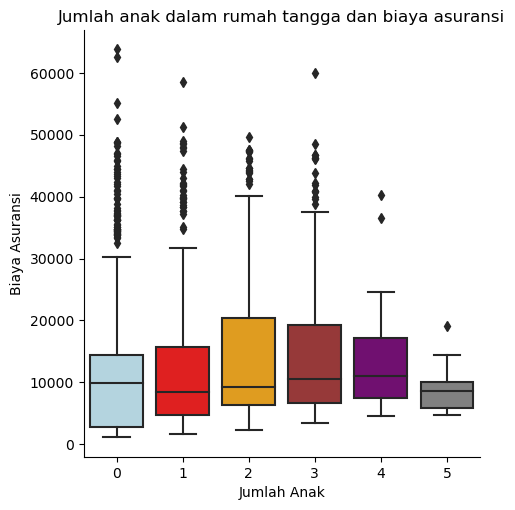

In [11]:
colors = ['lightblue','red','orange','brown','purple','grey']
g = sns.catplot(data=insurance, x='children', y='charges', kind='box', palette=colors)
for ax in g.axes.flat:
    ax.set(title='Jumlah anak dalam rumah tangga dan biaya asuransi',
          xlabel='Jumlah Anak',
          ylabel='Biaya Asuransi')
plt.show()

In [12]:
insurance['children'].corr(insurance['charges'])

0.06799822684790487

## 3. Bagaimana jumlah distribusi people berdasarkan Wilayah

In [13]:
group_people = insurance.groupby("region").count()
group_people

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


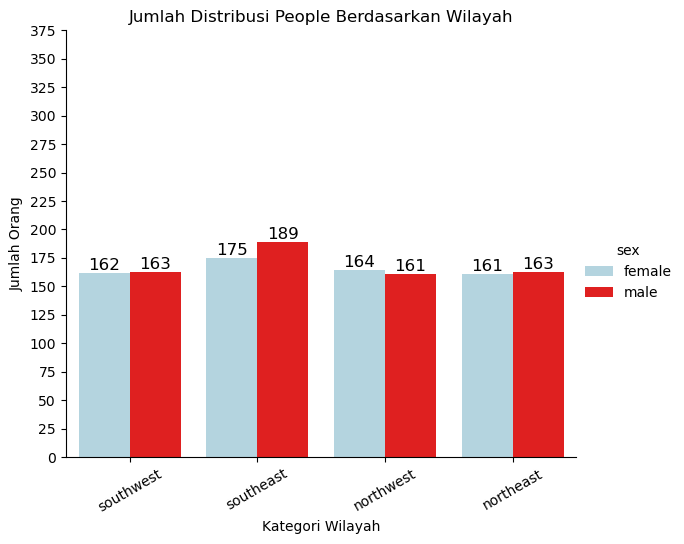

In [14]:
g = sns.catplot(data=insurance, x='region', hue='sex', kind='count', aspect=1.2, palette=colors)
for ax in g.axes.flat:
    ax.set(title='Jumlah Distribusi People Berdasarkan Wilayah', xlabel='Kategori Wilayah', ylabel='Jumlah Orang')
    ax.set_yticks([y for y in range(0, 400, 25)])
    ax.tick_params('x', labelrotation=30)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

Dari informasi tersebut, orang-orang didistribusikan dengan cukup merata di empat wilayah. Di antara mereka, wilayah Tenggara memiliki jumlah orang terbanyak dalam data.

## 4. Bagaimana Jumlah Orang yang Terdistribusi berdasarkan Umur

In [15]:
insurance_count_by_age = insurance.groupby('age')[['age']].count()
insurance_count_by_age = insurance_count_by_age.rename(columns={'age': 'count'})
insurance_count_by_age.T

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
count,69,68,29,28,28,28,28,28,28,28,...,26,26,26,25,25,23,23,23,23,22


In [16]:
insurance_count_by_age.shape

(47, 1)

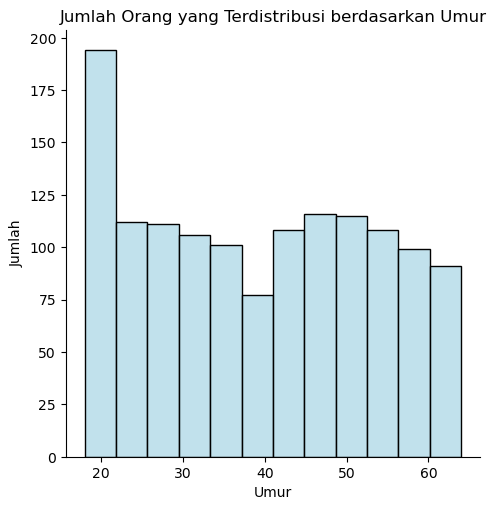

In [18]:
g = sns.displot(data=insurance, x='age', kind='hist',color='lightblue', aspect=1, legend=False)
for ax in g.axes.flat:
    ax.set(title='Jumlah Orang yang Terdistribusi berdasarkan Umur',
          xlabel='Umur',
           ylabel='Jumlah')
plt.show()

Histogram tersebut menunjukkan distribusi usia individu dalam DataFrame 'ins_data', dengan puncak di pertengahan usia 20-an dan jumlah individu yang berkurang secara bertahap pada usia yang lebih tua.

## 5. Bagaimana Biaya Asuransi Terdistribusi

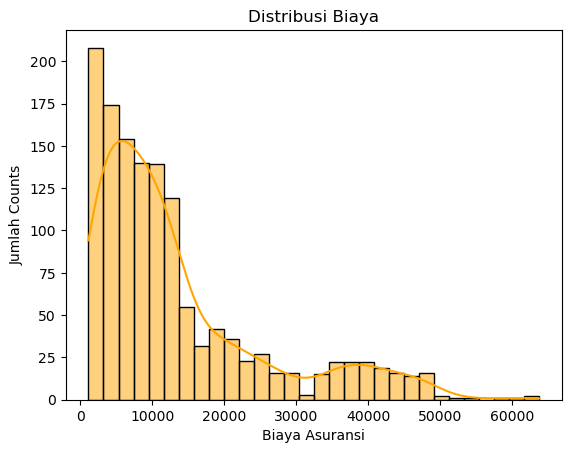

In [19]:
ax = sns.histplot(data=insurance, x='charges', kde=True, color='orange')
ax.set(title='Distribusi Biaya', 
       xlabel='Biaya Asuransi', 
       ylabel='Jumlah Counts')
       
plt.show()

Histogram tersebut menampilkan biaya asuransi untuk sejumlah individu, dengan sebagian besar biaya berada dalam kisaran 0-25.000 dan beberapa melebihi 60.000. Terlihat distribusi yang sedikit miring, dengan ekor yang lebih panjang di sisi kanan.

## 6. BIN Kolom BMI

In [20]:
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity class I', 'Obesity class II', 'Obesity class III']
ranges = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '35-39.9','>=40']
pd.DataFrame(list(zip(labels, ranges)),columns=['labels', 'ranges'])

,labels,ranges
0,Underweight,<18.5
1,Normal weight,18.5-24.9
2,Overweight,25-29.9
3,Obesity class I,30-34.9
4,Obesity class II,35-39.9
5,Obesity class III,>=40


In [35]:
insurance['bmi_class'] = pd.cut(insurance.bmi, bins=[0, 18.5, 25, 30, 35, 40, 100],
      labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity class I', 'Obesity class II', 'Obesity class III'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity class I
2,28,male,33.000,3,no,southeast,4449.46200,Obesity class I
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Saya telah menggunakan kriteria yang diberikan di atas untuk membagi indeks massa tubuh (BMI) menjadi 6 kategori: Kurus, Berat badan Normal, Kelebihan Berat Badan, Obesitas Kelas I, Obesitas Kelas II, dan Obesitas Kelas III.

## 7. Bagaimana Hubungan Biaya Asuransi terhadap BMI

In [1]:
sns.set_palette(['darkorange', 'blue'])
ax = sns.scatterplot(data=insurance, x='bmi', y='charges', hue='smoker')
ax.set(title = 'Hubungan Biaya Asuransi terhadap BMI',
      xlabel = 'BMI',
      ylabel = 'Biaya Asuransi')

NameError: name 'sns' is not defined

Dalam scatter plot ini, BMI dan biaya memiliki hubungan linear yang lemah, kita dapat mengasumsikan bahwa ada faktor lain yang lebih efektif daripada BMI. Jika kita tambahkan perokok ke dalam plot, tampaknya perokok akan dikenai biaya yang jauh lebih tinggi dibandingkan dengan bukan perokok.

## 8. Bagaimana Hubungan Status Pekokok terhadap Biaya Asuransi?

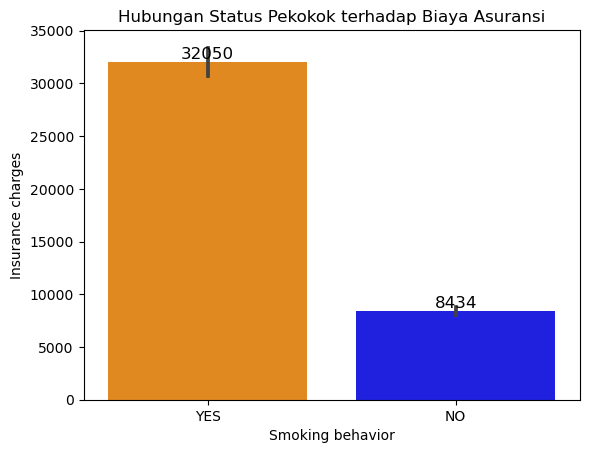

In [27]:
sns.set_palette(['darkorange', 'blue'])
ax = sns.barplot(data=insurance, x='smoker', y='charges')
ax.set(title = 'Hubungan Status Pekokok terhadap Biaya Asuransi',
      xlabel = 'Smoking behavior',
      ylabel = 'Insurance charges',
      xticklabels = ['YES', 'NO'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

Plot tersebut memberi tahu kita bahwa biasanya biaya asuransi bagi perokok jauh lebih tinggi daripada yang bukan perokok.

## 9. Bagaimana Hubungan Biaya Asuransi di berbagai Wilayah

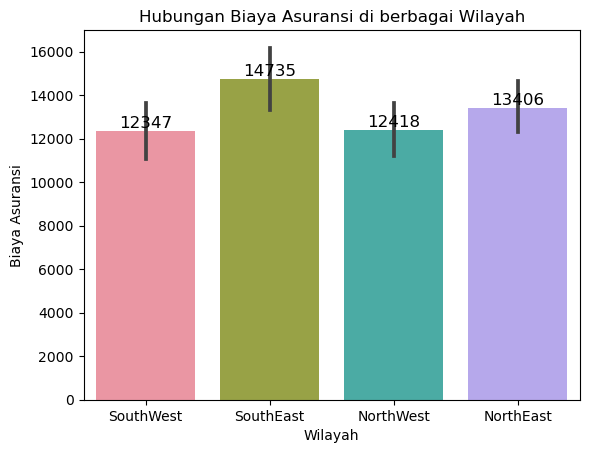

In [33]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.barplot(data=insurance, x='region', y='charges')
ax.set(title = 'Hubungan Biaya Asuransi di berbagai Wilayah',
      xlabel = 'Wilayah',
      ylabel = 'Biaya Asuransi',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

 bar plot tersebut menunjukkan bahwa rata-rata biaya asuransi di wilayah Southeast sedikit lebih tinggi daripada tiga wilayah lainnya. Peringkatnya adalah Tenggara, Timur Laut, Barat Laut, dan kemudian Barat Daya.

## 10. Wilayah Mana yang memiliki presentase obesitas tertinggi

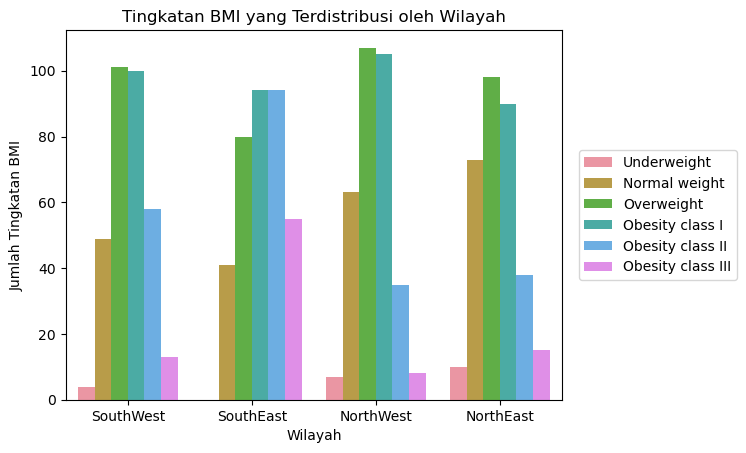

In [36]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.countplot(data=insurance, x='region', hue='bmi_class')
ax.set(title = 'Tingkatan BMI yang Terdistribusi oleh Wilayah',
      xlabel = 'Wilayah',
      ylabel = 'Jumlah Tingkatan BMI',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
plt.legend(loc='center left',bbox_to_anchor=(1.02, 0.5))

Semua distribusi Tingkatan BMI di empat wilayah, saya akan menggabungkan Tingkatan BMI menjadi hanya dua kelas, yaitu Obesitas dan Non-Obesitas.

In [37]:
def bmi_class_convert(row):
    if row.bmi_class == 'Obesity class I':
        return 'Obesity'
    elif row.bmi_class == 'Obesity class II':
        return 'Obesity'
    elif row.bmi_class == 'Obesity class III':
        return 'Obesity'
    else:
        return 'Non Obesity'
    
insurance['bmi_class']= insurance.apply(bmi_class_convert, axis=1)
insurance['bmi_class'].value_counts()

Obesity        705
Non Obesity    633
Name: bmi_class, dtype: int64

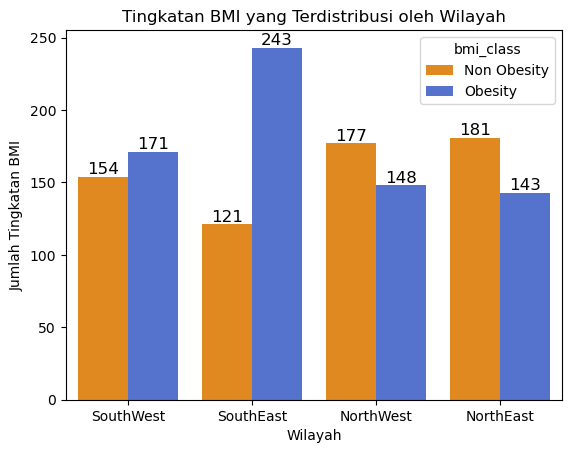

In [39]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.countplot(data=insurance, x='region', hue='bmi_class')
ax.set(title = 'Tingkatan BMI yang Terdistribusi oleh Wilayah',
      xlabel = 'Wilayah',
      ylabel = 'Jumlah Tingkatan BMI',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

Setelah menggabungkan dan membedakan kelas BMI menjadi Obesitas dan Non-Obesitas, tidak peduli apakah itu kelas I, II, atau III Obesitas, jelas bahwa wilayah Tenggara memiliki persentase Obesitas tertinggi dibandingkan dengan wilayah lainnya.